# Checkpoint: Yelp Restaurant Reviews Sentiment
Let's analyze the sentiment for Yelp reviews.

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('../data/tmp/restaurant.csv', index_col=0)
positive_phrases = pd.read_csv('../data/tmp/positive.csv', header=0, names=['phrases', 'count'])
negative_phrases = pd.read_csv('../data/tmp/negative.csv', header=0, names=['phrases', 'count'])

## What are the most positive phrases?

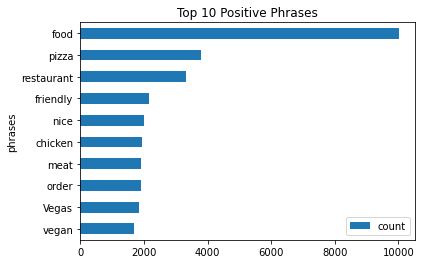

In [10]:
positive_phrases[0:10].plot.barh(title='Top 10 Positive Phrases', x='phrases').invert_yaxis()

## What are the most negative phrases?

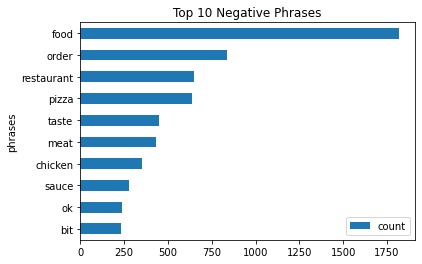

In [11]:
negative_phrases[0:10].plot.barh(title='Top 10 Negative Phrases', x='phrases').invert_yaxis()

In [12]:
df = df.assign(tokens=df.sentence.str.split(' '))
df = df.assign(tokens=df.tokens.apply(lambda x: len(x)))
df_rev = df.groupby('index')[['compound', 'tokens']].sum()

## What is the distribution of sentiment for these reviews?

In [16]:
df_rev

,compound,tokens
index,,
0,50.8387,3980
1,38.7459,3352
2,46.6277,3898
3,42.0313,3406
4,38.4171,3461
...,...,...
995,49.2662,3579
996,37.4593,2973
997,46.2508,3878


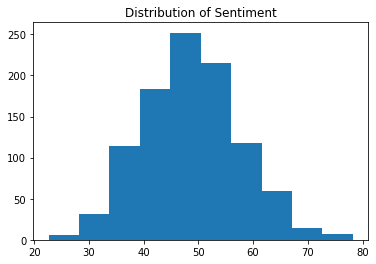

In [13]:
plt.hist(df_rev.compound)
plt.title(label='Distribution of Sentiment')
plt.show()

## What is the distribution of review length?
Review length is the number of words written for a review.

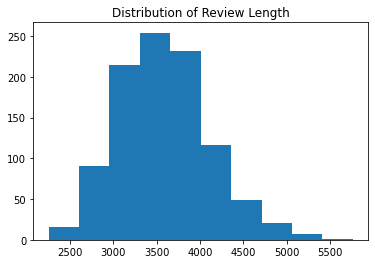

In [14]:
plt.hist(df_rev.tokens)
plt.title(label='Distribution of Review Length')
plt.show()

## Plotting the relationship between how positive/negative a review was and how long it was.

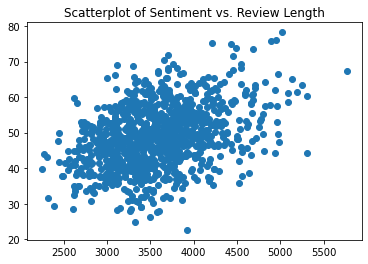

In [15]:
plt.scatter(x=df_rev['tokens'], y=df_rev['compound'])
plt.title("Scatterplot of Sentiment vs. Review Length")
plt.show()